In [39]:
# Marching Cube Test
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

import torch

In [33]:
# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(3, 3, 3, levelset=False)
ellip_double = ellip_base #np.concatenate((ellip_base[:-1, ...],
#                               ellip_base[2:, ...]), axis=0)

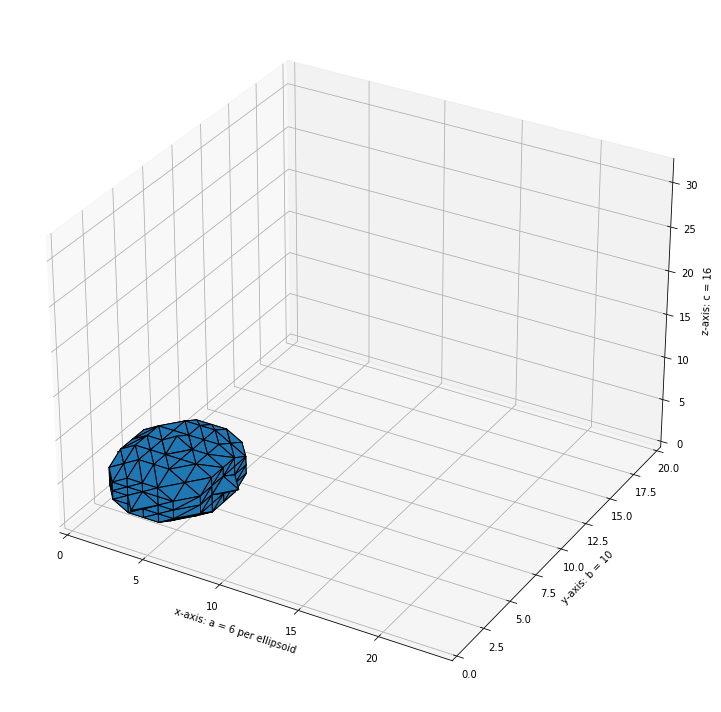

In [34]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

In [37]:
N=256

# NOTE: the voxel_origin is actually the (bottom, left, down) corner, not the middle
voxel_origin = [-1, -1, -1]
voxel_size = 2.0 / (N - 1)


[-1, -1, -1]

In [57]:

overall_index = torch.arange(0, N ** 3, 1, out=torch.LongTensor())
samples = torch.zeros(N ** 3, 4)


In [59]:

# transform first 3 columns
# to be the x, y, z index
samples[:, 2] = overall_index % N
samples[:, 1] = (overall_index.long() / N) % N
samples[:, 0] = ((overall_index.long() / N) / N) % N

In [60]:
# transform first 3 columns
# to be the x, y, z coordinate
samples[:, 0] = (samples[:, 0] * voxel_size) + voxel_origin[2]
samples[:, 1] = (samples[:, 1] * voxel_size) + voxel_origin[1]
samples[:, 2] = (samples[:, 2] * voxel_size) + voxel_origin[0]

In [61]:
num_samples = N ** 3
samples.requires_grad = False

In [66]:
head = 0
max_batch=32 ** 3
while head < num_samples:
    if (head == 1 ):
        samples[:, 3] = 1
    head += max_batch

In [64]:
samples

tensor([[-1.0000, -1.0000, -1.0000,  0.0000],
        [-1.0000, -1.0000, -0.9922,  0.0000],
        [-1.0000, -0.9999, -0.9843,  0.0000],
        ...,
        [ 1.0078,  1.0078,  0.9843,  0.0000],
        [ 1.0078,  1.0078,  0.9922,  0.0000],
        [ 1.0078,  1.0078,  1.0000,  0.0000]])

In [67]:
sdf_values = samples[:, 3]
sdf_values = sdf_values.reshape(N, N, N)

In [68]:
sdf_values

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [71]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(sdf_values.numpy(), level=0.0, spacing=[voxel_size] * 3)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

<ipython-input-71-9f6e8a58c0b3>:2: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, normals, values = measure.marching_cubes_lewiner(sdf_values.numpy(), level=0.0, spacing=[voxel_size] * 3)


RuntimeError: No surface found at the given iso value.